<a href="https://colab.research.google.com/github/darshanjoshi16/MachineLearningPracticals/blob/main/Practical%208%20(Regression)%20/%20ML_Lab_Assignment_8_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implement the following Regression Models for any datasets of your choice**


1) Simple Linear Regression Model

2) Multiple Linear Regression Model

3) Logistic Regression Model

4) Polynomial Regression Model

In [34]:
#importing the dataset using the pandas library
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split   

df = pd.read_csv('/content/Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [35]:
print("Name of Columns: ",df.columns)
print("*"*80)
print("Count of rows: ",len(df.index.values))
print("*"*80)
print("Sample column data:",df.iloc[:, 0].values)
print("*"*80)
print("Sample row data:",df.iloc[:,1].values)

Name of Columns:  Index(['YearsExperience', 'Salary'], dtype='object')
********************************************************************************
Count of rows:  30
********************************************************************************
Sample column data: [ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]
********************************************************************************
Sample row data: [ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [36]:
#now we will split the dataset into training and testing dataset
x= df.iloc[:, 0].values  
y= df.iloc[:, 1].values 

 
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.30, random_state=5)


# **Using the Simple Linear Regression**

In [24]:
from sklearn.linear_model import LinearRegression  

#calling the method
regressor= LinearRegression() 
#training the model 
regressor.fit(x_train.reshape(-1,1), y_train.reshape(-1,1))

#deriving the intercept and coefficient
print("intercept: ",regressor.intercept_)
print("*"*80) 
print("coeffcient: ",regressor.coef_)

#for prediction purpose
y_pred= regressor.predict(x_test.reshape(-1,1))



intercept:  [27182.22562441]
********************************************************************************
coeffcient:  [[9298.06674988]]


In [37]:
#we will check the metrics as well
from sklearn import metrics

#here we are comparing the values after model training and predicted values
df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df2)

print("*"*80)
r2=metrics.r2_score(y_test, y_pred) #R2
print("R2{}",r2)



     Actual      Predicted
0   55794.0   64374.492624
1  121872.0  124811.926498
2  113812.0  103426.372973
3  105582.0  110864.826373
4   81363.0   82040.819449
5   63218.0   63444.685949
6   37731.0   41129.325749
7   57081.0   65304.299299
8  116969.0  115513.859748
********************************************************************************
R2{} 0.9624024983951907


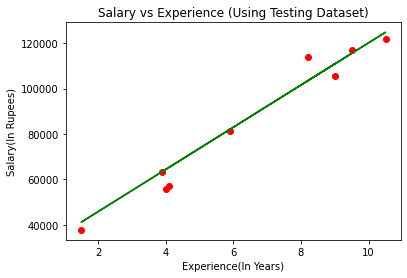

In [33]:
#here we will do the plotting
plt.scatter(x_test, y_test, color="red")
plt.plot(x_test, y_pred, color="green")   
plt.title("Salary vs Experience (Using Testing Dataset)")  
plt.xlabel("Experience(In Years)")  
plt.ylabel("Salary(In Rupees)")  
plt.show()  

# **Using Multiple Linear Regression**

In [38]:
#here we will use the famous boston dataset which is available in scikit library
from sklearn.linear_model import LinearRegression
from sklearn import datasets

#dataset describing
house_boston = datasets.load_boston()
print(house_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [44]:
#splitting the dataset
train_x, test_x, train_y, test_y = train_test_split(house_boston.data,
                                                    house_boston.target,
                                                    test_size=0.2,
                                                    random_state=35)
#calling the linear regression method
lr = LinearRegression()

#training and fitting of the data into the model
lr.fit(train_x, train_y)

#prediction purpose
pred_y = lr.predict(test_x)

#creating the dataframe for the value
df3 = pd.DataFrame({'Actual': test_y.flatten(), 'Predicted': pred_y.flatten()})
print(df3)

print("*"*80)
r2=metrics.r2_score(test_y, pred_y)
print("R2{}",r2)

     Actual  Predicted
0      21.8  21.159091
1      19.8  21.994437
2      23.2  27.180723
3      15.6  16.218239
4       7.5  13.472476
..      ...        ...
97     18.4  15.847141
98     24.7  24.873093
99     18.3  19.176406
100    13.8   5.811852
101    15.2  19.541623

[102 rows x 2 columns]
********************************************************************************
R2{} 0.688724017688114


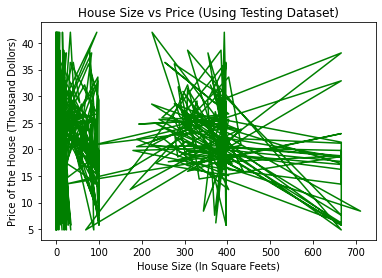

In [47]:
#here we will do the plotting
#this graph shown the multiple linear regression as the asked
plt.plot(test_x, pred_y, color="green")   
plt.title("House Size vs Price (Using Testing Dataset)")  
plt.xlabel("House Size (In Square Feets)")  
plt.ylabel("Price of the House (Thousand Dollors)")  
plt.show() 

# **Using Logistic Regression**

In [52]:
#logistic regression model
from sklearn.linear_model import LogisticRegression

#loading the dataset which is the breast cancer detection
cancer_data = datasets.load_breast_cancer()

print("Feature Names: ",cancer_data.feature_names)
print("*"*80)
print("Target Names: ",cancer_data.target_names)




Feature Names:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
********************************************************************************
Target Names:  ['malignant' 'benign']


In [55]:
#testing and training data splitting
train_x, test_x, train_y, test_y = train_test_split(cancer_data.data,cancer_data.target,test_size=0.2,random_state=42)

#calling the logistic regression function
lr = LogisticRegression()

#fitting the model
lr.fit(train_x, train_y) 
pred_y = lr.predict(test_x)

print(pred_y)
print("*"*80)
print("Intercept: ",lr.intercept_)
print("*"*80)
print("Slopes: ",lr.coef_)


[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0]
********************************************************************************
Intercept:  [0.24229794]
********************************************************************************
Slopes:  [[ 1.27120631  0.53104743  0.09708479 -0.01104135 -0.04880264 -0.23271777
  -0.32159675 -0.13762949 -0.07282662 -0.01475604  0.04364483  0.55553143
   0.05201804 -0.10287029 -0.00455004 -0.04761377 -0.06574448 -0.01770278
  -0.01714852 -0.00417679  1.33641113 -0.56227185 -0.2011313  -0.01532972
  -0.08682724 -0.70238356 -0.8682992  -0.25450112 -0.23456291 -0.06531525]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

********************************************************************************
Confusion Matrix:  [[40  3]
 [ 1 70]]
********************************************************************************
Accuracy Score:  0.9649122807017544


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


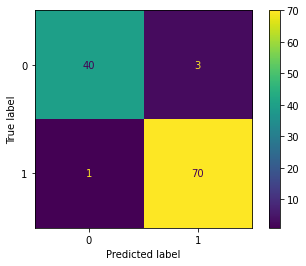

In [59]:
#Lets assess the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
print(classification_report(test_y, pred_y))
print("*"*80)
print("Confusion Matrix: ",confusion_matrix(test_y, pred_y))
print("*"*80)
print("Accuracy Score: ",accuracy_score(test_y, pred_y))

plot_confusion_matrix(lr, test_x, test_y.reshape(-1, 1))

# **Using Polynomial regression**

[  1.70806452   3.04187987   4.70292388   6.69119657   9.00669792
  11.64942794  14.61938662  17.91657397  21.54098999  25.49263467
  29.77150802  34.37761004  39.31094073  44.57150008  50.1592881
  56.07430478  62.31655014  68.88602415  75.78272684  83.00665819
  90.55781821  98.4362069  106.64182425 115.17467027 124.03474495
 133.22204831 142.73658033 152.57834101 162.74733037 173.24354839]


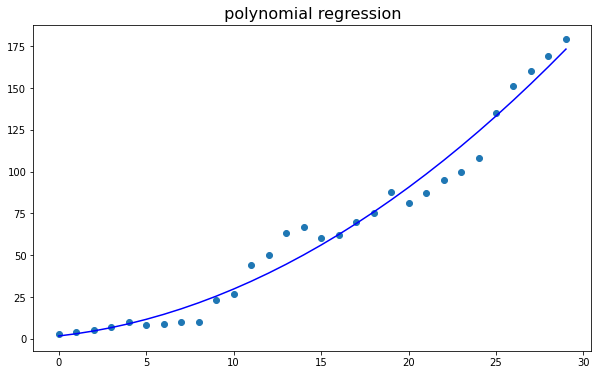

In [64]:
#importing the libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#here we will create the dataset of our own choice
x = np.arange(0, 30)
y = [3, 4, 5, 7, 10, 8, 9, 10, 10, 23, 27, 44, 50, 63, 67, 60, 62, 70, 75, 88, 81, 87, 95, 100, 108, 135, 151, 160, 169, 179]

#here degree 3 shows that we want to work on x^2 polynomial
poly = PolynomialFeatures(degree=2, include_bias=False)

#creating new features
poly_features = poly.fit_transform(x.reshape(-1, 1))

#instance of the linear model and fitting the model
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)

#predicted values
y_predicted = poly_reg_model.predict(poly_features)
print(y_predicted)

plt.figure(figsize=(10, 6))
plt.title(" polynomial regression ", size=16)
plt.scatter(x, y)
plt.plot(x, y_predicted, c="blue")
plt.show()